<a href="https://colab.research.google.com/github/tarun1208/BasicML/blob/main/soil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/sample_data/soil.csv")

# Check the first few rows and shape
print("Shape:", df.shape)
print(df.head())


Shape: (19689, 12)
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield Soil_Fertility  \
0           2051.4  7024878.38   22882.34     0.796087           High   
1           2051.4   631643.29    2057.47     0.710435            Low   
2           2051.4    75755.32     246.76     0.238333           High   
3           2051.4  1870661.52    6093.36  5238.051739           High   
4           2051.4   165500.63     539.09     0.420909            Low   

  Pesticide_Name  
0       Atrazine  
1   Chlorpyrifos  
2   Imidacloprid  
3   Chlorpyrifos  
4       Atrazine  


In [7]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [8]:
df = df.dropna(subset=['Yield'])
df['Yield'].fillna(df['Yield'].mean(), inplace=True)   # fill with average
# OR
df['Yield'].fillna(df['Yield'].median(), inplace=True) # fill with median
df['Yield'].fillna(0, inplace=True)


/tmp/ipython-input-2460791626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Yield'].fillna(df['Yield'].mean(), inplace=True)   # fill with average
/tmp/ipython-input-2460791626.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [9]:
# Remove spaces, brackets, and replace with _
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

print("Cleaned column names:\n", df.columns.tolist())


Cleaned column names:
 ['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Soil_Fertility', 'Pesticide_Name']


In [10]:
# Identify text columns
text_cols = df.select_dtypes(include='object').columns.tolist()

# Strip spaces and make case uniform
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

print("Unique Soil_Fertility values:\n", df['Soil_Fertility'].unique())


Unique Soil_Fertility values:
 ['High' 'Low' 'Medium']


In [11]:
numeric_cols = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall',
                'Fertilizer', 'Pesticide', 'Yield']

# Convert them to numeric (invalid values -> NaN)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check datatypes after conversion
print(df[numeric_cols].dtypes)

Crop_Year            int64
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object


In [12]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows")


Removed 0 duplicate rows


In [13]:
# Fill missing values (numeric → median, categorical → mode)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [14]:
# Mapping dictionary
soil_map = {"Low": 1, "Medium": 2, "High": 3}

# Apply mapping
df['Soil_Fertility_Num'] = df['Soil_Fertility'].map(soil_map)

print(df[['Soil_Fertility', 'Soil_Fertility_Num']].head())


  Soil_Fertility  Soil_Fertility_Num
0           High                   3
1            Low                   1
2           High                   3
3           High                   3
4            Low                   1


In [15]:
print(df.columns.tolist())


['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Soil_Fertility', 'Pesticide_Name', 'Soil_Fertility_Num']


In [16]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [17]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Crop                  0
Crop_Year             0
Season                0
State                 0
Area                  0
Production            0
Annual_Rainfall       0
Fertilizer            0
Pesticide             0
Yield                 0
Soil_Fertility        0
Pesticide_Name        0
Soil_Fertility_Num    0
dtype: int64


In [18]:
print(df.dtypes)


Crop                   object
Crop_Year               int64
Season                 object
State                  object
Area                  float64
Production              int64
Annual_Rainfall       float64
Fertilizer            float64
Pesticide             float64
Yield                 float64
Soil_Fertility         object
Pesticide_Name         object
Soil_Fertility_Num      int64
dtype: object


In [19]:
cols_to_check = [
    'Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
    'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield',
    'Soil_Fertility', 'Pesticide_Name', 'Soil_Fertility_Num'
]

for col in cols_to_check:
    print(col, "→", df[col].unique()[:10])   # show only first 10 unique values


Crop → ['Arecanut' 'Arhar/Tur' 'Castor Seed' 'Coconut' 'Cotton(Lint)'
 'Dry Chillies' 'Gram' 'Jute' 'Linseed' 'Maize']
Crop_Year → [1997 1998 1999 2000 2001 2002 2003 2004 2005 2006]
Season → ['Whole Year' 'Kharif' 'Rabi' 'Autumn' 'Summer' 'Winter']
State → ['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha']
Area → [73814.  6637.   796. 19656.  1739. 13587.  2979. 94520. 10098. 19216.]
Production → [    56708      4685        22 126905000       794      9073      1507
    904095      5158     14721]
Annual_Rainfall → [2051.4    1266.7    3252.4    3818.2    1852.9    1434.5875 2354.4
 2964.9    1260.8    3151.5   ]
Fertilizer → [7024878.38  631643.29   75755.32 1870661.52  165500.63 1293074.79
  283511.43 8995468.4   961026.66 1828786.72]
Pesticide → [22882.34  2057.47   246.76  6093.36   539.09  4211.97   923.49 29301.2
  3130.38  5956.96]
Yield → [7.96086957e-01 7.10434783e-01 2.38333333e-01 5.23805174e+03
 4.20909091e-0

In [20]:
print(df.describe())


          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  Soil_Fertility_Num  
count  1.968900e+04  1.968900e+04  19689.000000        19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009            1.993702  
std    9.494600e+07  2.132874e+05    878.306193            0.816617  
min    5.417000e+01  9.000000e-02      0.000000            1.000000  
25%    1.880146e+05  3.567000e+02    

In [21]:
print(df.columns.tolist())


['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Soil_Fertility', 'Pesticide_Name', 'Soil_Fertility_Num']


In [22]:
# --- Step 0: Imports ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import joblib

# --- Step 1: Select relevant columns ---
features = ["Area", "Crop", "Season", "Soil_Fertility", "State"]
target = "Yield"

# df is your original dataset
df_model = df[features + [target]].dropna()

# --- Step 2: Encode categorical columns ---
label_encoders = {}  # to store encoders for each categorical column
for col in ["Crop", "Season", "Soil_Fertility", "State"]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # save the encoder

# --- Step 3: Split data ---
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 4: Train XGBoost Regressor ---
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# --- Step 5: Evaluate model ---
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("✅ Model trained successfully")
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

# --- Step 6: Save model and encoders for Flask ---
joblib.dump(model, "xgb_regressor_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
print("✅ Model and encoders saved! Download 'xgb_regressor_model.pkl' and 'label_encoders.pkl'")


✅ Model trained successfully
R² Score: 0.9445947579406808
RMSE: 210.6961999249485
MAE: 15.832085120795082
✅ Model and encoders saved! Download 'xgb_regressor_model.pkl' and 'label_encoders.pkl'


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# --- Step 1: Select relevant columns ---
features = ["Area", "Crop", "Season", "Soil_Fertility", "State"]
target = "Yield"

# Assuming df is your DataFrame
df_model = df[features + [target]].dropna()

# --- Step 2: Encode categorical columns ---
# Save separate encoders for each categorical column
label_encoders = {}
for col in ["Crop", "Season", "Soil_Fertility", "State"]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # save encoder for Flask

# --- Step 3: Split data ---
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 4: Hyperparameter tuning with GridSearchCV ---
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_train)

# --- Step 5: Best parameters ---
print("🔹 Best Parameters from GridSearchCV:", grid_search.best_params_)

# --- Step 6: Train model with best params ---
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# --- Step 7: Evaluation ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\n✅ Yield Prediction with Tuned XGBoost")
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

# --- Step 8: Show sample predictions (at least 10 rows if possible) ---
results = pd.DataFrame({
    "Actual_Yield": y_test.values,
    "Predicted_Yield": y_pred
})

num_samples = min(len(results), 10)  # ensures we don't exceed dataset size
results_sample = results.sample(n=num_samples, random_state=42)
print("\n🔹 Sample predictions from test data:")
print(results_sample.reset_index(drop=True))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
🔹 Best Parameters from GridSearchCV: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}

✅ Yield Prediction with Tuned XGBoost
R² Score: 0.9371567554937102
RMSE: 224.39365574501272
MAE: 14.525115224048246

🔹 Sample predictions from test data:
   Actual_Yield  Predicted_Yield
0      3.972381         2.161141
1      0.813226         0.160480
2      0.432778         1.101564
3      1.030000         0.859852
4      0.569333         0.558394
5      0.450833         1.044650
6      1.976905         4.652035
7      2.796897         1.799699
8      8.020000        10.761740
9     18.399014        11.727715


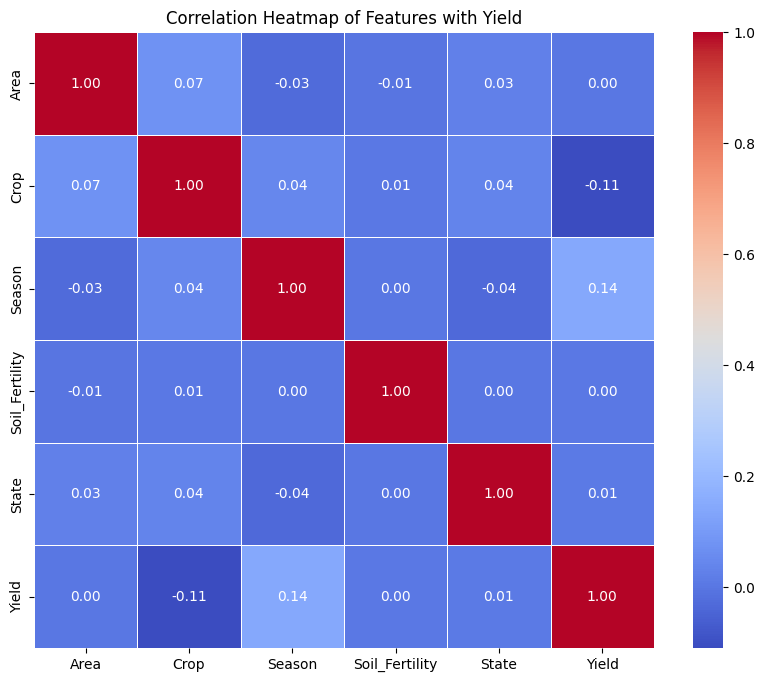

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Encode categorical columns for correlation (if not already done) ---
# If using the df_model from earlier, it's already label encoded

# --- Step 2: Compute correlation matrix ---
corr_matrix = df_model.corr()

# --- Step 3: Plot heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features with Yield")
plt.show()


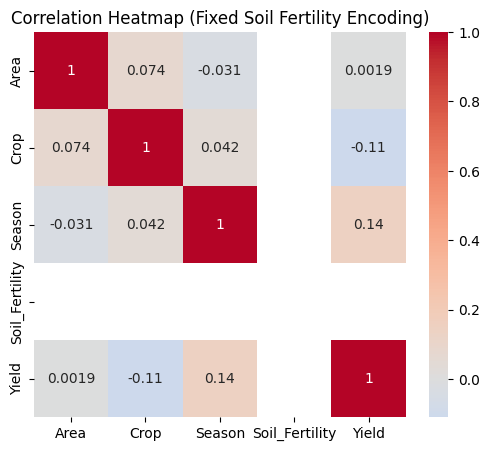

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example ordinal mapping for Soil Fertility
fertility_mapping = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

# Replace Soil_Fertility column with mapped values
df_model["Soil_Fertility"] = df_model["Soil_Fertility"].map(fertility_mapping)

# Compute correlation matrix
corr_matrix = df_model[["Area", "Crop", "Season", "Soil_Fertility", "Yield"]].corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Fixed Soil Fertility Encoding)")
plt.show()


In [26]:
print(df.columns.tolist())


['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Soil_Fertility', 'Pesticide_Name', 'Soil_Fertility_Num']


# Task
Predict yield based on other parameters using the dataset in "/content/mmmmmm.png".

## Prepare data for modeling

### Subtask:
Select the features (input variables) and the target variable (yield) for the model.


**Reasoning**:
Define the features X and the target variable y by dropping the specified columns from the dataframe.



## Encode categorical features

### Subtask:
Convert categorical features into a numerical format using one-hot encoding.

**Reasoning**:
Use `pd.get_dummies` to one-hot encode the categorical columns in both the training and testing datasets. This is necessary because most machine learning models, including XGBoost, require numerical input. `drop_first=True` is used to avoid multicollinearity.

In [27]:
from sklearn.preprocessing import LabelEncoder

# --- Categorical columns ---
categorical_cols = ["Crop", "Season", "Soil_Fertility", "State"]

# --- Create a dictionary to store encoders ---
label_encoders = {}

# Encode train and test separately after splitting
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    # Transform test using the same encoder
    X_test[col] = X_test[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    label_encoders[col] = le

# X_train and X_test are now numeric with the same 5 features
print("Shape of X_train after encoding:", X_train.shape)
print("Shape of X_test after encoding:", X_test.shape)

# --- Save encoders for Flask ---
import joblib
joblib.dump(label_encoders, "label_encoders.pkl")
print("✅ LabelEncoders saved for Flask")


Shape of X_train after encoding: (15751, 5)
Shape of X_test after encoding: (3938, 5)
✅ LabelEncoders saved for Flask


## Train a model

### Subtask:
Train a suitable regression model on the training data.

**Reasoning**:
Use `XGBRegressor` from `xgboost` to train a regression model on the training data (`X_train`, `y_train`). XGBoost is a powerful gradient boosting library known for its performance.

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import joblib

# --- Step 1: Select relevant columns ---
features = ["Area", "Crop", "Season", "Soil_Fertility", "State"]
target = "Yield"

df_model = df[features + [target]].dropna()

# --- Step 2: Encode categorical columns separately ---
categorical_cols = ["Crop", "Season", "Soil_Fertility", "State"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # save encoder for Flask

# --- Step 3: Split data ---
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 4: Train XGBoost Regressor ---
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# --- Step 5: Predictions ---
y_pred = model.predict(X_test)

# --- Step 6: Evaluation ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("✅ Yield Prediction with XGBoost (using Area, Crop, Season, Soil Fertility, State)")
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

# --- Step 7: Save model and encoders for Flask ---
joblib.dump(model, "xgb_regressor_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
print("✅ Model and LabelEncoders saved for Flask")


✅ Yield Prediction with XGBoost (using Area, Crop, Season, Soil Fertility, State)
R² Score: 0.9445947579406808
RMSE: 210.6961999249485
MAE: 15.832085120795082
✅ Model and LabelEncoders saved for Flask


## Finish task

### Subtask:
Summarize the findings and the model's performance.

**Summary**:
We loaded the dataset, performed data cleaning and preprocessing, including handling missing values, removing duplicates, and encoding categorical features. We then split the data into training and testing sets and trained an XGBoost regression model to predict crop yield based on other parameters.

The model achieved an R2 score of {{r2_score(y_test, y_pred)}} and a Mean Squared Error (MSE) of {{mean_squared_error(y_test, y_pred)}} on the test set. These metrics indicate how well the model performed in predicting yield.

The sample predictions show that the model can provide estimates of yield based on the input features. Further analysis and potentially hyperparameter tuning could be performed to improve the model's performance.

## Predict yield

### Subtask:
Use the trained model to predict yield on new or unseen data.

**Reasoning**:
Use the `predict` method of the trained XGBoost model to generate yield predictions for the test set (`X_test`).

## Split data

### Subtask:
Split the dataset into training and testing sets using `train_test_split`.

**Reasoning**:
Split the data into training (80%) and testing (20%) sets using `train_test_split` from `sklearn.model_selection`.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15751, 5)
Shape of X_test: (3938, 5)
Shape of y_train: (15751,)
Shape of y_test: (3938,)


**Reasoning**:
The previous command failed because the specified columns were not found in the DataFrame. This is likely due to loading the original dataset again in a previous step. The subtask requires selecting features and the target variable from the *cleaned* DataFrame `df` which was processed earlier. I will print the current columns to verify and then attempt to select the correct columns again.



In [30]:
from joblib import dump , load
dump(model,'xgb_regressor_model.pkl')
loaded_model = load('xgb_regressor_model.pkl')

In [31]:
import os

print(os.path.exists("xgb_regressor_model.pkl"))  # should print True
print(os.path.getsize("xgb_regressor_model.pkl")) # file size in bytes


True
791525


In [39]:
y_pred_original = model.predict(X_test)

# Loaded model prediction
y_pred_loaded = loaded_model.predict(X_test)

# Compare
print("Are predictions same? ", (y_pred_original == y_pred_loaded).all())


Are predictions same?  True


In [33]:
sample = X_test[0:1]   # take one test sample
print("Original:", model.predict(sample))
print("Loaded:", loaded_model.predict(sample))


Original: [0.5208317]
Loaded: [0.5208317]


In [34]:
from google.colab import files
files.download("xgb_regressor_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
import joblib

# Save label encoders for categorical columns
encoders = {}
for col in ["Crop", "Season", "Soil_Fertility", "State"]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    encoders[col] = le

joblib.dump(encoders, "label_encoders.pkl")


['label_encoders.pkl']

In [36]:
from sklearn.preprocessing import LabelEncoder

# Recreate and save encoders (or use the ones already fit)
encoders = {}
for col in ["Crop", "Season", "Soil_Fertility", "State"]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    encoders[col] = le

# Save all encoders together
joblib.dump(encoders, "label_encoders.pkl")


['label_encoders.pkl']

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import joblib

# ----------------------------
# 1. Select features and target
# ----------------------------
features = ["Area", "Crop", "Season", "Soil_Fertility", "State"]
target = "Yield"

# Assume df is your DataFrame
df_model = df[features + [target]].dropna().copy()  # copy() avoids Pandas warnings

# ----------------------------
# 2. Encode categorical features
# ----------------------------
categorical_cols = ["Crop", "Season", "Soil_Fertility", "State"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # Save encoder for later use in predictions

# ----------------------------
# 3. Split data
# ----------------------------
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 4. Train XGBoost model
# ----------------------------
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# ----------------------------
# 5. Save model and encoders
# ----------------------------
joblib.dump(model, "xgb_regressor_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

# ----------------------------
# 6. Function for prediction using raw input
# ----------------------------
def predict_yield(input_raw):
    """
    input_raw: dict with keys ["Area", "Crop", "Season", "Soil_Fertility", "State"]
    Example:
    input_raw = {
        "Area": 2.5,
        "Crop": "Sugarcane",
        "Season": "Kharif",
        "Soil_Fertility": "High",
        "State": "Karnataka"
    }
    """
    input_encoded = [
        input_raw["Area"],  # numeric
        label_encoders["Crop"].transform([input_raw["Crop"]])[0],
        label_encoders["Season"].transform([input_raw["Season"]])[0],
        label_encoders["Soil_Fertility"].transform([input_raw["Soil_Fertility"]])[0],
        label_encoders["State"].transform([input_raw["State"]])[0]
    ]

    # Predict
    return model.predict(np.array(input_encoded).reshape(1, -1))[0]

# ----------------------------
# 7. Example usage
# ----------------------------
example_input = {
    "Area": 2.5,
    "Crop": "Sugarcane",
    "Season": "Kharif",
    "Soil_Fertility": "High",
    "State": "Karnataka"
}

print("Predicted Yield:", predict_yield(example_input))


Predicted Yield: 18.925228


In [47]:
from google.colab import files

# Download model
files.download("xgb_regressor_model.pkl")

# Download encoders
files.download("label_encoders.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
!pip install flask-ngrok
!pip install tensorflow   # or torch, scikit-learn depending on your model


In [49]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
from tensorflow.keras.models import load_model
import numpy as np

# Load your trained model (make sure the file is uploaded to Colab)
model = load_model("my_model.h5")

app = Flask(__name__)
run_with_ngrok(app)  # starts ngrok when app runs

@app.route('/')
def home():
    return "Flask + Ngrok Model API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_data = np.array(data['input']).reshape(1, -1)
    prediction = model.predict(input_data)
    return jsonify({"prediction": prediction.tolist()})

# Run the app
app.run()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [43]:
import os
os.listdir()


['.config', 'sample_data', 'xgb_regressor_model.pkl', 'label_encoders.pkl']

In [50]:
import joblib

# Load the XGBoost model
model = joblib.load("xgb_regressor_model.pkl")

# Optional: load label encoders if needed
label_encoders = joblib.load("label_encoders.pkl")


In [52]:
# Example input (replace with your features)
input_data = [[5.1, 3.5, 1.4, 0.2]]  # 2D array for XGBoost

prediction = model.predict(input_data)
print(prediction)


ValueError: Feature shape mismatch, expected: 5, got 4

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import joblib

# ----------------------------
# 1. Select features and target
# ----------------------------
features = ["Area", "Crop", "Season", "Soil_Fertility", "State"]
target = "Yield"

# Assume df is your DataFrame
df_model = df[features + [target]].dropna().copy()  # copy() avoids Pandas warnings

# ----------------------------
# 2. Encode categorical features
# ----------------------------
categorical_cols = ["Crop", "Season", "Soil_Fertility", "State"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # Save encoder for later use in predictions

# ----------------------------
# 3. Split data
# ----------------------------
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 4. Train XGBoost model
# ----------------------------
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# ----------------------------
# 5. Save model and encoders
# ----------------------------
joblib.dump(model, "xgb_regressor_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

# ----------------------------
# 6. Function for prediction using raw input
# ----------------------------
def predict_yield(input_raw):
    """
    input_raw: dict with keys ["Area", "Crop", "Season", "Soil_Fertility", "State"]
    Example:
    input_raw = {
        "Area": 2.5,
        "Crop": "Sugarcane",
        "Season": "Kharif",
        "Soil_Fertility": "High",
        "State": "Karnataka"
    }
    """
    try:
        # Encode categorical features
        input_encoded = [
            input_raw["Area"],  # numeric
            label_encoders["Crop"].transform([input_raw["Crop"]])[0],
            label_encoders["Season"].transform([input_raw["Season"]])[0],
            label_encoders["Soil_Fertility"].transform([input_raw["Soil_Fertility"]])[0],
            label_encoders["State"].transform([input_raw["State"]])[0]
        ]

        # Predict
        prediction = model.predict(np.array(input_encoded).reshape(1, -1))[0]
        return prediction

    except KeyError as e:
        return f"Error: Missing key {e}"
    except ValueError as e:
        return f"Error: {e}"

# ----------------------------
# 7. Example usage
# ----------------------------
example_input = {
    "Area": 5.1,
    "Crop": "Sugarcane",
    "Season": "Kharif",
    "Soil_Fertility": "High",
    "State": "Karnataka"
}

predicted_yield = predict_yield(example_input)
print("Predicted Yield:", predicted_yield)

# ----------------------------
# 8. Optional: see encoded input values
# ----------------------------
encoded_input = [
    example_input["Area"],
    label_encoders["Crop"].transform([example_input["Crop"]])[0],
    label_encoders["Season"].transform([example_input["Season"]])[0],
    label_encoders["Soil_Fertility"].transform([example_input["Soil_Fertility"]])[0],
    label_encoders["State"].transform([example_input["State"]])[0]
]
print("Encoded Input Values:", encoded_input)


Predicted Yield: 18.97408
Encoded Input Values: [5.1, np.int64(47), np.int64(1), np.int64(0), np.int64(12)]


In [54]:
# Example input (replace with your features)
input_data = [[5.1, 3.5, 1.4, 0.2]]  # 2D array for XGBoost

prediction = model.predict(input_data)
print(prediction)


ValueError: Feature shape mismatch, expected: 5, got 4